In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

df_1 = pd.read_csv("weather_data_forecast_1day.csv")
df_2 = pd.read_csv("weather_data_forecast_2day.csv")
df_3 = pd.read_csv("weather_data_forecast_3day.csv")
df_4 = pd.read_csv("weather_data_forecast_4day.csv")
df_5 = pd.read_csv("weather_data_forecast_5day.csv")

In [2]:
# Ajouter un suffixe aux colonnes pour les distinguer
df_1 = df_1.add_suffix('_jour1')
df_2 = df_2.add_suffix('_jour2')
df_3 = df_3.add_suffix('_jour3')
df_4 = df_4.add_suffix('_jour4')
df_5 = df_5.add_suffix('_jour5')

In [3]:
# Combiner les fichiers en un seul DataFrame
all_data = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=1)


In [4]:
# Supprimer les colonnes "Ville" "Latitude" et "Longitude", "Date", "Run_Date" des jours 2 à 5
all_data.drop(columns=['Ville_jour2', 'Latitude_jour2', 'Longitude_jour2', 'Date_jour2', 'Run_Date_jour2',
                       'Ville_jour3', 'Latitude_jour3', 'Longitude_jour3', 'Date_jour3', 'Run_Date_jour3',
                       'Ville_jour4', 'Latitude_jour4', 'Longitude_jour4', 'Date_jour4', 'Run_Date_jour4',
                       'Ville_jour5', 'Latitude_jour5', 'Longitude_jour5', 'Date_jour5', 'Run_Date_jour5'], inplace=True)

all_data.shape

(26000, 40)

c:\Users\j-bal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\j-bal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


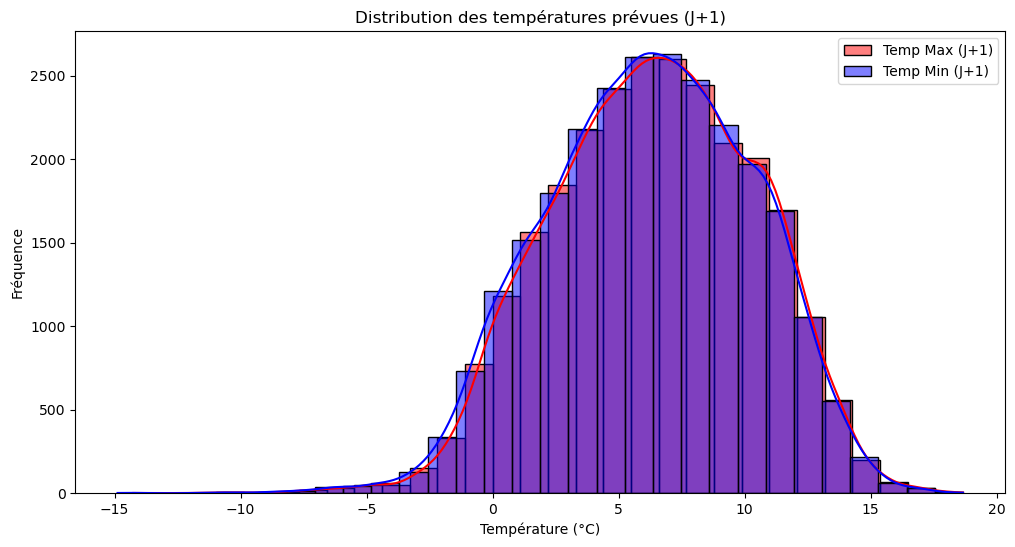

In [5]:
# Visualisation des températures
plt.figure(figsize=(12, 6))
sns.histplot(all_data["Temp_Max_jour1"], bins=30, kde=True, color="red", label="Temp Max (J+1)")
sns.histplot(all_data["Temp_Min_jour1"], bins=30, kde=True, color="blue", label="Temp Min (J+1)")
plt.xlabel("Température (°C)")
plt.ylabel("Fréquence")
plt.title("Distribution des températures prévues (J+1)")
plt.legend()
plt.show()

In [6]:
# Créer une colonne "Size" pour la taille des points basée sur Temp_Avg
all_data["Size"] = (all_data["Temp_Avg_jour1"] - all_data["Temp_Avg_jour1"].min()) / \
                    (all_data["Temp_Avg_jour1"].max() - all_data["Temp_Avg_jour1"].min()) * 30 + 10

# Création de la carte interactive
fig = px.scatter_mapbox(
    all_data, 
    lat="Latitude_jour1", 
    lon="Longitude_jour1", 
    color="Temp_Avg_jour1", 
    size="Size",  # Taille des points variable
    color_continuous_scale="plasma",  
    hover_name="Ville_jour1",  
    hover_data={"Temp_Avg_jour1": True, "Temp_Max_jour1": True, "Temp_Min_jour1": True},  
    mapbox_style="open-street-map",  
    zoom=3.5,  
    title="Carte Météo : Températures Moyennes (J+1)"
)

# Affichage de la carte
fig.show()

In [28]:
# Définir les bornes de température
min_temp = all_data["Temp_Avg_jour1"].min()
max_temp = all_data["Temp_Avg_jour1"].max()

fig = px.density_mapbox(
    all_data,
    lat="Latitude_jour1",
    lon="Longitude_jour1",
    z="Temp_Avg_jour1",  # Influence des données de Temp_Avg
    mapbox_style="open-street-map",
    animation_frame="Date_jour1",  # Animation basée sur la date
    zoom=3.5,
    radius=7,
    color_continuous_scale="thermal",
    center={"lat": 46.603354, "lon": 1.888334},
    labels={"Temp_Avg_jour1": "Average temperature (°C)"},
    range_color=[min_temp, max_temp]  # Échelle de couleur fixe
)

fig.show()

c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



City with the Highest Average Temperature 
City : Toulon
Average Temperature : 11.166663461538462

 **Top 5 Cities with the Highest Average Temperature** 
   Ville_jour1  Temp_Avg_jour1
47      Toulon       11.166663
29   Marseille       10.764317
34        Nice       10.665971
1      Ajaccio       10.647337
10    Biarritz        9.894154


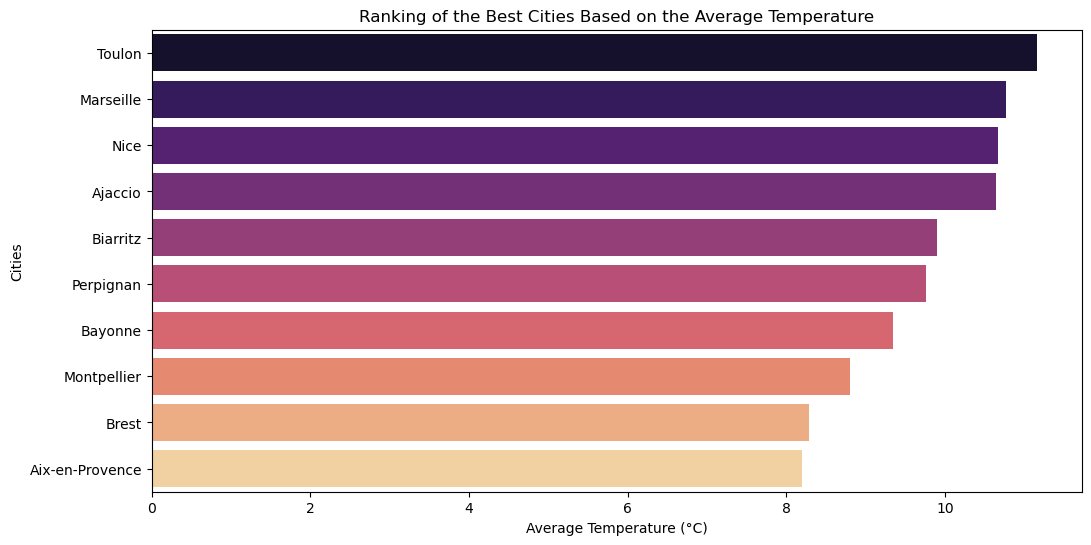

In [31]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Temp_Avg_jour1"].mean().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Temp_Avg_jour1", ascending=False)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Highest Average Temperature ")
print(f"City : {best_city['Ville_jour1']}")
print(f"Average Temperature : {best_city['Temp_Avg_jour1']}")

print("\n **Top 5 Cities with the Highest Average Temperature** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Temp_Avg_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Cities")
plt.title("Ranking of the Best Cities Based on the Average Temperature")
plt.show()


City with the Lowest Average Temperature  
City : Chamonix-Mont-Blanc
Average Temperature : -0.8970192307692307

 **Top 5 Cities with the Lowest Average Temperature** 
            Ville_jour1  Temp_Avg_jour1
17  Chamonix-Mont-Blanc       -0.897019
32             Mulhouse        3.154423
5                Annecy        3.231788
45        Saint-Étienne        3.370904
46           Strasbourg        3.543798


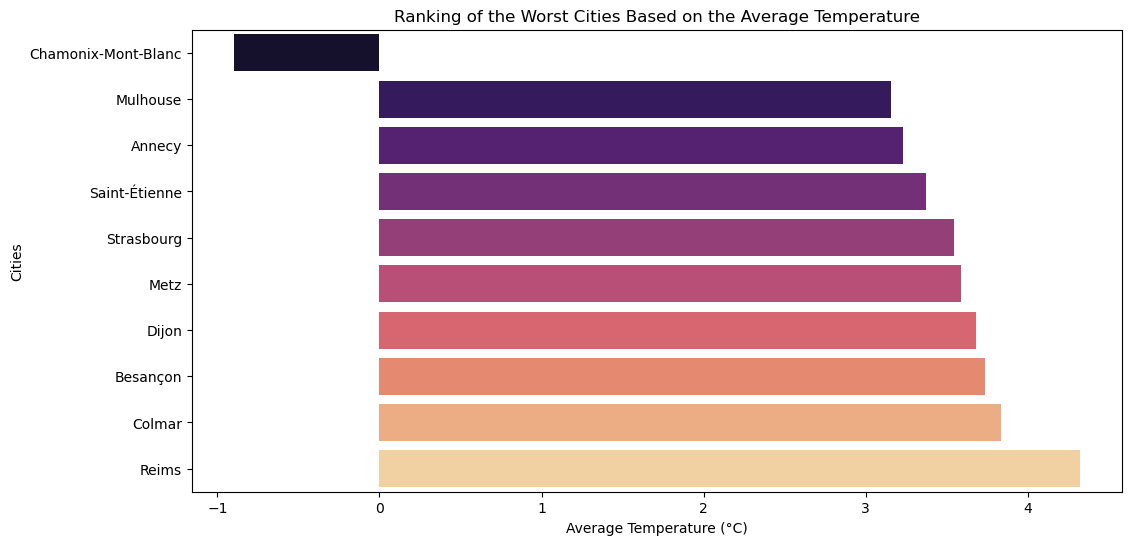

In [32]:
# Calculer le score total pour chaque ville pour le jour 1
city_ranking = all_data.groupby("Ville_jour1")["Temp_Avg_jour1"].mean().reset_index()
    
# Trier les villes par meilleur score
city_ranking = city_ranking.sort_values(by="Temp_Avg_jour1", ascending=True)

# Trouver la ville avec le meilleur score
best_city = city_ranking.iloc[0]

# Afficher les résultats
print("City with the Lowest Average Temperature  ")
print(f"City : {best_city['Ville_jour1']}")
print(f"Average Temperature : {best_city['Temp_Avg_jour1']}")

print("\n **Top 5 Cities with the Lowest Average Temperature** ")
print(city_ranking.head(5))

# Visualisation du classement en barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Temp_Avg_jour1", 
    y="Ville_jour1", 
    data=city_ranking.head(10), 
    palette="magma"
)
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Cities")
plt.title("Ranking of the Worst Cities Based on the Average Temperature")
plt.show()


In [10]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Temp_Avg_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Temp_Avg_jour1": "mean",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Temp_Avg_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_5_cities = city_ranking.head(5)
    worst_5_cities = city_ranking.tail(5)

    # Afficher le tableau
    display(pd.concat([top_5_cities, worst_5_cities]))

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


Ville_jour1  Temp_Avg_jour1  Latitude_jour1  Longitude_jour1
47               Toulon       11.166663       43.125731         5.930492
29            Marseille       10.764317       43.296174         5.369953
34                 Nice       10.665971       43.700936         7.268391
1               Ajaccio       10.647337       41.926399         8.737603
10             Biarritz        9.894154       43.483252        -1.559278
46           Strasbourg        3.543798       48.584614         7.750713
45        Saint-Étienne        3.370904       45.440147         4.387306
5                Annecy        3.231788       45.899235         6.128885
32             Mulhouse        3.154423       47.746723         7.338994
17  Chamonix-Mont-Blanc       -0.897019       45.924670         6.872751

In [34]:
# Vérifier si les colonnes existent
if all(col in all_data.columns for col in ["Temp_Avg_jour1", "Latitude_jour1", "Longitude_jour1"]):
    
    # Calculer le score total pour chaque ville pour le jour 1
    city_ranking = all_data.groupby("Ville_jour1", as_index=False).agg({
        "Temp_Avg_jour1": "mean",
        "Latitude_jour1": "first",
        "Longitude_jour1": "first"
    })
    
    # Trier les villes par meilleur score
    city_ranking = city_ranking.sort_values(by="Temp_Avg_jour1", ascending=False)

    # Sélectionner les 5 meilleures et les 5 pires villes
    top_10_cities = city_ranking.head(10).copy()
    worst_10_cities = city_ranking.tail(10).copy()

    # Ajouter une colonne pour différencier les catégories
    top_10_cities["Category"] = "Top 10"
    worst_10_cities["Category"] = "Worst 10"

    # Fusionner les deux catégories
    top_worst_cities = pd.concat([top_10_cities, worst_10_cities])

    # Appliquer une taille uniforme pour toutes les villes
    top_worst_cities["Size"] = 5  # Taille fixe pour tous les points

    # Définir une palette de couleurs : Rouge pour le Top 5, Bleu pour le Worst 5
    color_map = {"Top 10": "red", "Worst 10": "blue"}

    # Carte interactive des 5 meilleures et 5 pires villes
    fig = px.scatter_mapbox(
        top_worst_cities,
        lat="Latitude_jour1",
        lon="Longitude_jour1",
        color="Category",  
        size="Size",  
        hover_name="Ville_jour1",
        hover_data={"Temp_Avg_jour1": True},
        mapbox_style="open-street-map",
        zoom=3.5,
        color_discrete_map=color_map,
        size_max=10  
    )

    fig.show()

else:
    print("Certaines colonnes nécessaires n'existent pas dans le DataFrame.")


c:\Users\j-bal\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



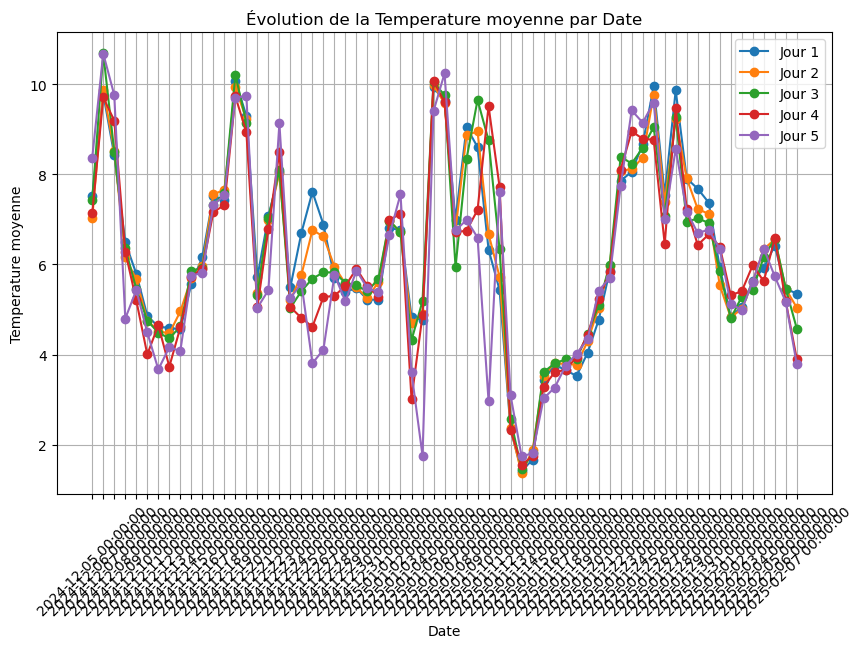

In [12]:
# Regrouper par date et pour chaque jour afficher la température moyenne
Temp_Avg_sum = all_data.groupby("Date_jour1")[
    ["Temp_Avg_jour1", "Temp_Avg_jour2", "Temp_Avg_jour3", "Temp_Avg_jour4", "Temp_Avg_jour5"]
].mean()

# Renommer les colonnes pour plus de clarté
Temp_Avg_sum.columns = ["Jour 1", "Jour 2", "Jour 3", "Jour 4", "Jour 5"]

# Tracer un line plot cumulés par date
plt.figure(figsize=(10, 6))
for column in Temp_Avg_sum.columns:
    plt.plot(Temp_Avg_sum.index, Temp_Avg_sum[column], marker="o", linestyle="-", label=column)

# Ajouter des labels et une légende
plt.xlabel("Date")
plt.ylabel("Temperature moyenne")
plt.title("Évolution de la Temperature moyenne par Date")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

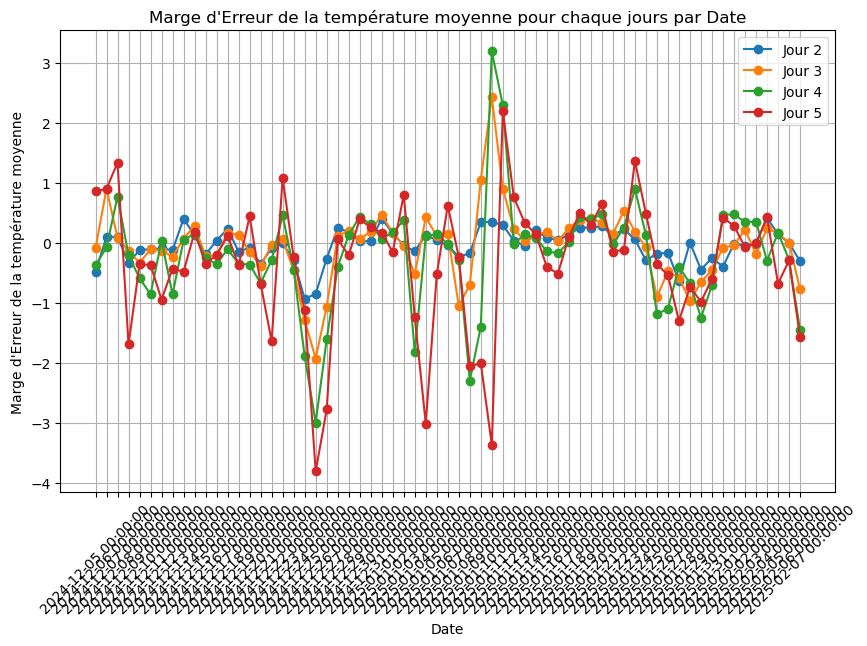

In [13]:
# Calculer la marge d'erreur entre les "weather_scores" "jour2" et "jour1"
Temp_Error_Margin1 = (Temp_Avg_sum["Jour 2"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin2 = (Temp_Avg_sum["Jour 3"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin3 = (Temp_Avg_sum["Jour 4"] - Temp_Avg_sum["Jour 1"])
Temp_Error_Margin4 = (Temp_Avg_sum["Jour 5"] - Temp_Avg_sum["Jour 1"])

# Tracer un line plot de la marge d'erreur
plt.figure(figsize=(10, 6))
plt.plot(Temp_Error_Margin1.index, Temp_Error_Margin1, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin2.index, Temp_Error_Margin2, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin3.index, Temp_Error_Margin3, marker="o", linestyle="-")
plt.plot(Temp_Error_Margin4.index, Temp_Error_Margin4, marker="o", linestyle="-")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Marge d'Erreur de la température moyenne")
plt.title("Marge d'Erreur de la température moyenne pour chaque jours par Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(["Jour 2", "Jour 3", "Jour 4", "Jour 5"])

# Afficher le graphique
plt.show()